In [46]:
import cv2
import numpy
import matplotlib.pyplot as plt
img= cv2.imread('left.jpg')
image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(image.shape)

(500, 800)


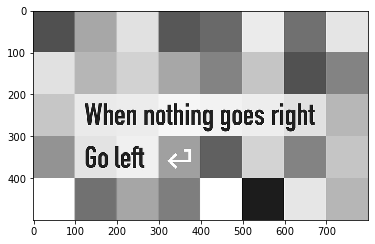

In [18]:
plt.imshow(img_r,cmap = 'gray')

In [32]:
img.ndim

3

In [52]:
kernel = np.array([[1,0,-1],
             [0,0,0],
             [-1,0,1]])

In [55]:
kernel = np.array([[-1,-1,-1],
             [-1,8,-1],
             [-1,-1,-1]])

In [45]:
kernel.shape

(3, 3)

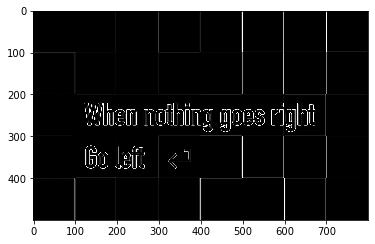

In [61]:
#kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(image,-1,kernel)
plt.imshow(dst,cmap = 'gray')

In [59]:
dst

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  3,   3,   3],
        [  0,   0,   0],
        [ 60,  60,  60]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  3,   3,   3],
        [  0,   0,   0],
        [ 60,  60,  60]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  3,   3,   3],
        [  0,   0,   0],
        [ 60,  60,  60]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  6,  18,  21],
        [  0,   0,   0],
        [222, 180,  84]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  6,  18,  21],
        [  0,   0,   0],
        [222, 180,  84]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  6,  18,  21],
        [  0,   0,   0],
        [222, 180,  84]]

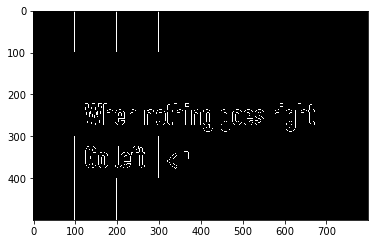

In [63]:
c = cv2.Canny(image,200,200)
plt.imshow(c,cmap = 'gray')

In [65]:
def convolve2d(image, kernel):
    """
    This function which takes an image and a kernel and returns the convolution of them.

    :param image: a numpy array of size [image_height, image_width].
    :param kernel: a numpy array of size [kernel_height, kernel_width].
    :return: a numpy array of size [image_height, image_width] (convolution output).
    """
    # Flip the kernel
#     kernel = np.flipud(np.fliplr(kernel))
#     # convolution output
#     output = np.zeros_like(image)

    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[1:-1, 1:-1] = image

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            image[y, x]=(kernel * image_padded[y: y+3, x: x+3]).sum()

    return image

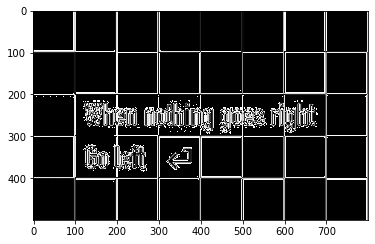

In [66]:
image_sharpen = convolve2d(image, kernel)
plt.imshow(image_sharpen,cmap = 'gray')


In [64]:
image_sharpen.shape

(500, 800)